## Bike Sharing Assignment by Simran Singh

### Data Dictionary
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

###### Citation: 
    [1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step 1 - Understanding, cleaning & visualising the data for intuitive understanding of the dataset
#### Loading and Inspecting the data

In [2]:
# reading the data 
BoomBikes = pd.read_csv("day.csv")

In [3]:
# viewing the data
BoomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the rows and columns of the data
BoomBikes.shape

(730, 16)

In [5]:
# making sure there are no null values
BoomBikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# viewing numerical statistics of the data
BoomBikes.describe().round(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.0,730.00,730.00,730.0,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.5,6.53,0.03,3.0,0.69,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.5,3.45,0.17,2.0,0.46,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.0,4.00,0.00,1.0,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.5,7.00,0.00,3.0,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.0,10.00,0.00,5.0,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


In [7]:
# checking the datatypes of the columns
BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Data Cleaning and Manipulation

In [8]:
# "instant" is just an index/serial no. for the record; it has no importance in our model
# "dteday" isnt needed because we have year and month columns already present
# "casual" + "registered" = "cnt"; so we dont need to have these two columns since we already have count

BoomBikes.drop(["instant", "dteday", "registered", "casual"], axis = 1, inplace = True)

In [9]:
# viewing the info of the data again, to check the changes
BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
# changing the values of the season column from numerical to categorical using the replace function
BoomBikes["season"].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)

In [11]:
# making sure changes have taken place
BoomBikes["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
# changing the values of the month column from numerical to categorical using the replace function
BoomBikes["mnth"].replace({1:"jan", 2:"feb", 3:"mar", 4:"apr", 5:"may", 6:"jun", 7:"jul", 8:"aug", 9:"sep", 10:"oct",
                          11:"nov", 12:"dec"}, inplace = True)

In [13]:
# making sure changes have taken place
BoomBikes["mnth"].value_counts()

aug    62
may    62
jul    62
dec    62
mar    62
jan    62
oct    62
apr    60
sep    60
jun    60
nov    60
feb    56
Name: mnth, dtype: int64

In [14]:
# changing the values of the weekday column from numerical to categorical using the replace function
BoomBikes["weekday"].replace({0:"sun", 1:"mon", 2:"tue", 3:"wed", 4:"thu", 5:"fri", 6:"sat"}, inplace = True)

In [15]:
# making sure changes have taken place
BoomBikes["weekday"].value_counts()

tue    105
mon    105
sun    104
sat    104
thu    104
fri    104
wed    104
Name: weekday, dtype: int64

In [16]:
# changing the values of the weather column from numerical to categorical using the replace function
BoomBikes["weathersit"].replace({1:"clear", 2:"misty/cloudy", 3:"light rain/snow", 4:"heavy rain/snow"}, 
                                inplace = True)

In [17]:
# making sure changes have taken place
BoomBikes["weathersit"].value_counts()

clear              463
misty/cloudy       246
light rain/snow     21
Name: weathersit, dtype: int64

In [18]:
# changing the datatypes of the above columns to categorical using the astype function
BoomBikes = BoomBikes.astype({"season":"category", "mnth":"category", "weekday":"category", 
                              "weathersit":"category"})

In [19]:
# making sure datatypes have been changed
BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


#### Visualizing the data

In [20]:
# viewing the data once again
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty/cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty/cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


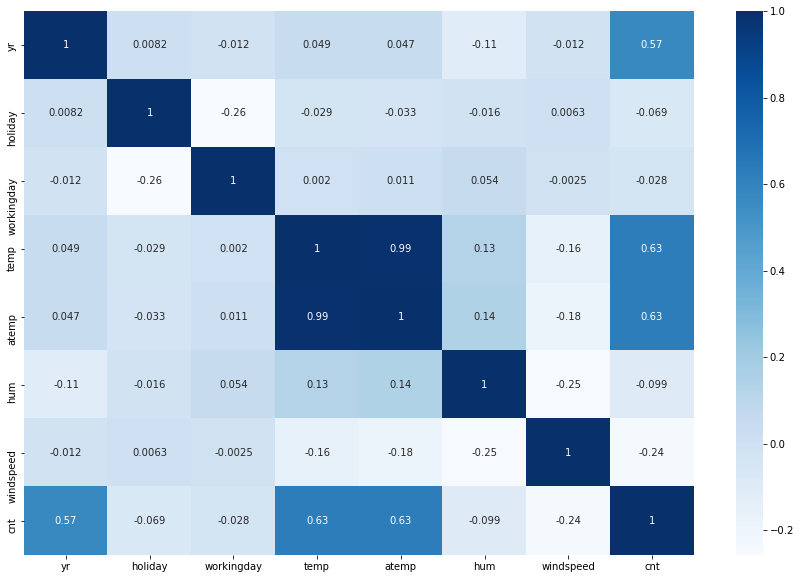

In [21]:
# checking correlation among variables using a heatmap
plt.figure(figsize = (15,10))
sns.heatmap(BoomBikes.corr(), annot = True, cmap = "Blues")
plt.show()

#### Decision to drop 'atemp' due to extremely high colliniearity with another perdictor variable 'temp'

In [22]:
# we can spot extremely high multicollinearity of 0.99 between 'temp' and 'atemp', we should drop one of the two
# atemp tells us the tempterature that it is 'feeling like'
# In this context, information about 'atemp' cannot be used by the business practically so I have decided to drop 
# 'atemp'

BoomBikes.drop("atemp", axis = 1, inplace = True)

In [23]:
# revised list of columns in the dataframe

BoomBikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

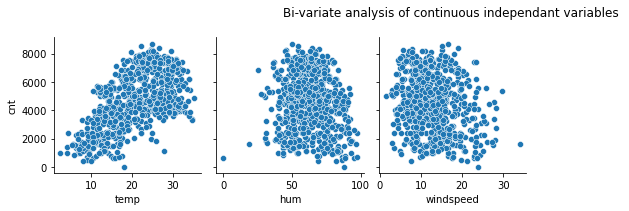

In [24]:
# pairplot of continuous columns, in order to get an instinct of the data

sns.pairplot(BoomBikes, x_vars=['temp', 'hum', 'windspeed'], y_vars='cnt', 
             kind='scatter', diag_kind = None)
plt.title("Bi-variate analysis of continuous independant variables \n")
plt.show()

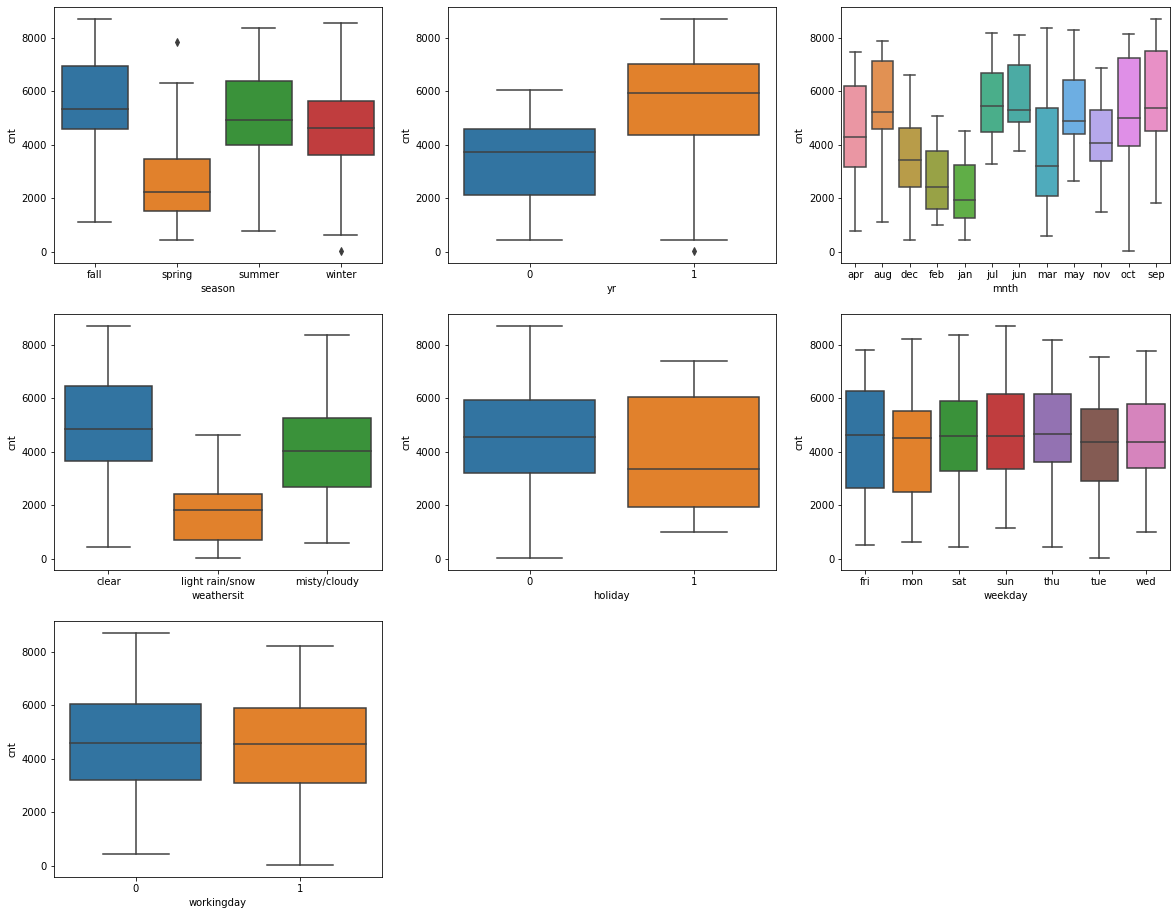

In [25]:
# subplot of categorical columns, in order to get an instinct of the data

plt.figure(figsize=(20, 16))
plt.title("Bi-Variate Analysis of categorical independant variables \n")

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BoomBikes)

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = BoomBikes)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = BoomBikes)

plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BoomBikes)

plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = BoomBikes)

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = BoomBikes)

plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = BoomBikes)
plt.show()

In [26]:
# correlation matrix of numerical variables
BoomBikes.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.053770,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,-0.098543,-0.235132,1.000000


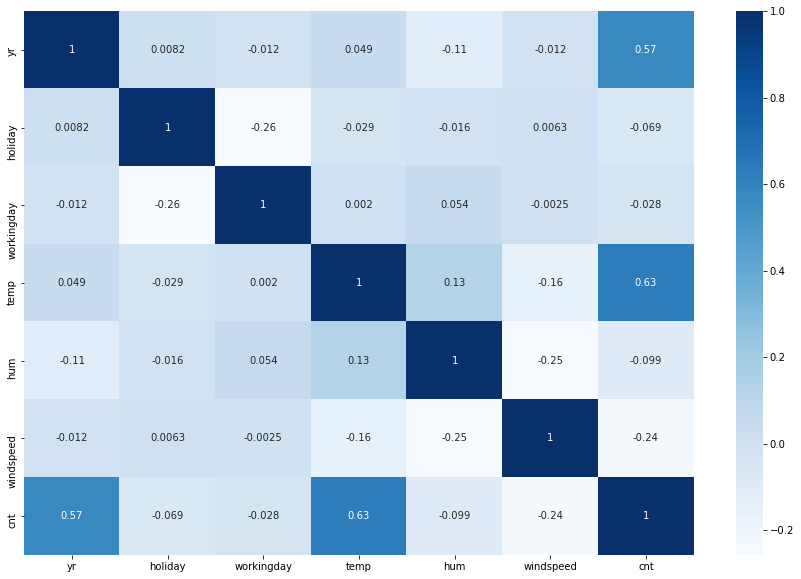

In [27]:
# once again viewing the heatmap before moving to data preperation
plt.figure(figsize = (15,10))
sns.heatmap(BoomBikes.corr(), annot = True, cmap = "Blues")
plt.show()

### Step 2 - Preparing the data for modelling
#### Creating Dummy Variables for 'season' and 'weathersit' columns

In [28]:
# viewing value counts of season column
BoomBikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [29]:
# creating dummy variables for 'season'
status_season = pd.get_dummies(BoomBikes["season"], drop_first = True)

In [30]:
# viewing the columns
status_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [31]:
# conactenating both the dataframes
BoomBikes = pd.concat([BoomBikes, status_season], axis = 1)

In [32]:
# dropping season column
BoomBikes.drop('season', axis = 1, inplace = True)

In [33]:
# creating dummy variables for 'mnth'
BoomBikes.mnth.value_counts()

oct    62
may    62
mar    62
jul    62
jan    62
dec    62
aug    62
sep    60
nov    60
jun    60
apr    60
feb    56
Name: mnth, dtype: int64

In [34]:
# creating dummy variables for 'mnth'
status_mnth = pd.get_dummies(BoomBikes["mnth"], drop_first = True)

In [35]:
# viewing the columns
status_mnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [36]:
# conactenating both the dataframes
BoomBikes = pd.concat([BoomBikes, status_mnth], axis = 1)

In [37]:
# dropping mnth column
BoomBikes.drop("mnth", axis = 1, inplace = True)

In [38]:
# viewing value counts of weekday column
BoomBikes.weekday.value_counts()

tue    105
mon    105
wed    104
thu    104
sun    104
sat    104
fri    104
Name: weekday, dtype: int64

In [39]:
# creating dummy variables for 'weekday'
status_weekday = pd.get_dummies(BoomBikes["weekday"], drop_first = True)

In [40]:
# viewing the columns
status_weekday.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [41]:
# conactenating both the dataframes
BoomBikes = pd.concat([BoomBikes, status_weekday], axis = 1)

In [42]:
# dropping weekday column
BoomBikes.drop("weekday", axis = 1, inplace = True)

In [43]:
# viewing value counts of weathersit column
BoomBikes.weathersit.value_counts()

clear              463
misty/cloudy       246
light rain/snow     21
Name: weathersit, dtype: int64

In [44]:
# creating dummy variables for 'weathersit'
status_weathersit = pd.get_dummies(BoomBikes["weathersit"], drop_first = True)

In [45]:
# viewing the columns
status_weathersit.head()

,light rain/snow,misty/cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [46]:
# conactenating both the dataframes
BoomBikes = pd.concat([BoomBikes, status_weathersit], axis = 1)

In [47]:
# dropping weathersit column
BoomBikes.drop('weathersit', axis = 1, inplace = True)

In [48]:
# looking at columns of final dataframe
BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   spring           730 non-null    uint8  
 8   summer           730 non-null    uint8  
 9   winter           730 non-null    uint8  
 10  aug              730 non-null    uint8  
 11  dec              730 non-null    uint8  
 12  feb              730 non-null    uint8  
 13  jan              730 non-null    uint8  
 14  jul              730 non-null    uint8  
 15  jun              730 non-null    uint8  
 16  mar              730 non-null    uint8  
 17  may             

#### Splitting the Data into Training and Testing Sets

In [49]:
# conducting train-test split
np.random.seed(0)
BB_train, BB_test = train_test_split(BoomBikes, train_size = 0.7, random_state = 100)

In [50]:
# viewing shape of trai and test dataframes
print(BB_train.shape)
print(BB_test.shape)

(510, 29)
(220, 29)


#### Rescaling the features

In [51]:
# declaring scaler as MinMaxScaler
scaler = MinMaxScaler()

In [52]:
# viewing columns to identify the columns to be rescaled
BB_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'light rain/snow', 'misty/cloudy'],
      dtype='object')

In [53]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

# performing fir_transform on the training data
BB_train[num_vars] = scaler.fit_transform(BB_train[num_vars])

In [54]:
# checking the max and min values
BB_train.describe().round(2)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light rain/snow,misty/cloudy
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,...,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.51,0.03,0.71,0.54,0.65,0.32,0.51,0.24,0.25,0.25,...,0.08,0.08,0.15,0.13,0.14,0.14,0.15,0.14,0.03,0.35
std,0.50,0.16,0.45,0.23,0.15,0.17,0.22,0.43,0.43,0.43,...,0.28,0.27,0.36,0.34,0.34,0.35,0.36,0.34,0.17,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.34,0.54,0.20,0.36,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.54,0.65,0.30,0.52,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.74,0.75,0.41,0.68,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### Dividing training set into X and Y sets for the model building

In [55]:
y_train = BB_train.pop('cnt')
X_train = BB_train

### Step 3 - Training the model

#### Using the LinearRegression function from SciKit Learn for its compatibility with Recursive Function Elimination 

In [56]:
# fitting the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
# I have chosen to do a blend of RFE and manual backward elimination method of feature selection;
# using RFE i'll select 20 variables and further drop insignificant ones
rfe = RFE(lm, 20)

In [58]:
# fitting RFE on training set
rfe = rfe.fit(X_train, y_train)

In [59]:
# viewing the ranking that rfe has given to the columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 4),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 6),
 ('mar', False, 9),
 ('may', False, 3),
 ('nov', True, 1),
 ('oct', False, 7),
 ('sep', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 8),
 ('tue', True, 1),
 ('wed', False, 5),
 ('light rain/snow', True, 1),
 ('misty/cloudy', True, 1)]

In [60]:
# taking cols where rfe support is true
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'dec', 'feb', 'jan', 'jul', 'nov', 'sep', 'sat',
       'sun', 'tue', 'light rain/snow', 'misty/cloudy'],
      dtype='object')

In [61]:
# updating X_train
X_train = X_train[col]

#### Building model using statsmodel, for the detailed statistics

In [62]:
# adding a constant to our X_train
X_train_lm = sm.add_constant(X_train)

# creating first model, fitting the model and looking at coefficients
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const              0.379997
yr                 0.230876
holiday           -0.133151
workingday        -0.055343
temp               0.462987
hum               -0.150981
windspeed         -0.186566
spring            -0.051572
summer             0.040132
winter             0.102211
dec               -0.046986
feb               -0.034758
jan               -0.062699
jul               -0.052489
nov               -0.041816
sep                0.073661
sat               -0.042950
sun               -0.037032
tue               -0.018600
light rain/snow   -0.253082
misty/cloudy      -0.057667
dtype: float64

In [63]:
# viewing summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.90e-185
Time:                        22:14:02   Log-Likelihood:                 519.42
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     489   BIC:                            -907.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3800      0.081     

In [64]:
# viewing the VIFs of all the features/ individual predictors

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,47.36
4,hum,38.38
3,temp,28.58
16,sun,9.58
15,sat,9.20
6,spring,7.02
5,windspeed,5.46
8,winter,4.90
7,summer,3.54
11,jan,2.54


In [65]:
# dropping 'workingday' because of high p-value (>0.05) and high VIF (>5)

X = X_train.drop(['workingday'], 1)

# Building a second LR model

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [66]:
# viewing summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.12e-186
Time:                        22:14:03   Log-Likelihood:                 519.10
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     490   BIC:                            -913.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3238      0.037     

In [67]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.73
2,temp,18.60
5,spring,5.48
4,windspeed,4.76
7,winter,4.09
6,summer,2.83
10,jan,2.38
18,misty/cloudy,2.35
0,yr,2.10
9,feb,1.92


In [68]:
# dropping variables with high p-value, that are thus insignificant
X = X.drop(['tue','sat','feb','sun'], 1)

# Building next LR model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [69]:
# viewing summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.15e-189
Time:                        22:14:03   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036     

In [70]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,misty/cloudy,2.32
0,yr,2.09
11,nov,1.85
9,jan,1.75


In [71]:
# at this point all our p-values are below the 0.05 threshhold, we can now focus on the VIF
# dropping 'hum' because of really high VIF
X = X.drop('hum', 1)

# Building next LR model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [72]:
# viewing summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.75e-186
Time:                        22:14:03   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2450      0.032     

In [73]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,nov,1.81
8,jan,1.66
9,jul,1.59
13,misty/cloudy,1.57


In [74]:
# the VIF of temp is slightly above the tolerable mark of 5, but since temp seems important from a business 
# perspective, and also seemed so during EDA; 
# I will keep it for now in the hope that dropping some less significant variables, one by one,
# (for the purpose of a lighter/less complex model) might reduce the multicollinearity of temp

In [75]:
# dropping 'nov' as it has least significance among all the variables
# this will reduce the no. of features; thereby resulting in a lighter model
X = X.drop('nov', 1)

# Building next LR model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [76]:
# viewing summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.74e-186
Time:                        22:14:03   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2283      0.031     

In [77]:
# Calculating the VIFs again for the new model in the hope that VIF if temp will reduce
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,yr,2.07
6,winter,2.05
8,jan,1.65
9,jul,1.59
12,misty/cloudy,1.57
10,sep,1.34


In [78]:
# we can see that the VIF of temp has reduced from 5.17 to 5.14 - 
# this means that nov was slightly collinear with temp

# Now dropping 'dec' because it is least significant variable now
X = X.drop('dec', 1)

# Building next LR model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [79]:
# viewing summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.14e-187
Time:                        22:14:03   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2154      0.030     

In [80]:
# Calculating the VIFs again for the new model in the hope that VIF if temp will reduce
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
7,jan,1.61
8,jul,1.59
11,misty/cloudy,1.56
9,sep,1.34


In [81]:
# we can see that the VIF of temp has fallen further from 5.14 to 5.13

# dropping 'jan' because now it is least significant
X = X.drop('jan', 1)

# Building next LR model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [82]:
# viewing the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.06e-187
Time:                        22:14:03   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030     

In [83]:
# Calculating the VIFs again for the new model in the hope that VIF if temp will reduce
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
7,jul,1.58
10,misty/cloudy,1.55
8,sep,1.34
9,light rain/snow,1.08


In [84]:
# we can see that the VIF of temp has fallen further from 5.12 to 5.09

# dropping 'jul' because now it is least significant
X = X.drop('jul', 1)

# Building next LR model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [85]:
# viewing the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.47e-186
Time:                        22:14:04   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1909      0.030     

In [86]:
# Calculating the VIFs again for the new model in the hope that VIF if temp will reduce
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,misty/cloudy,1.55
7,sep,1.23
8,light rain/snow,1.08
1,holiday,1.04


In [87]:
# vif of all variables, including temp, has fallen below 5
# we can now say lr_8 is the final model

### Step 4 - Residual Analysis

In [88]:
# creating y_train_pred so we can further calculate residuals
y_train_pred = lr_8.predict(X_train_lm)

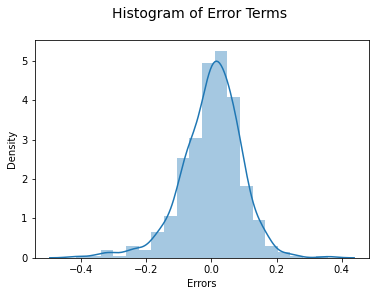

In [89]:
# Ploting the histogram of the error terms to ensure that assumptions of linear regression hold true

sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Histogram of Error Terms \n', fontsize = 14) 
plt.xlabel('Errors', fontsize = 10) 
plt.show()

# we can see that the distribution of residuals resembles a normal distribution

In [90]:
residuals = y_train.values-y_train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals: ", mean_residuals)

Mean of Residuals:  -2.27437894226029e-15


In [91]:
# mean of residuals is extremely close to zero, so we can say that the assumption is honoured

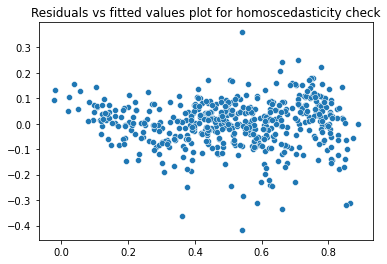

In [92]:
# Residuals vs fitted values plot for homoscedasticity check
p = sns.scatterplot(y_train_pred,residuals)
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [93]:
# This assumption says that the residuals have equal or almost equal variance across the regression line; 
# assumption is being honoured

### Step 5 - Making Predictions and Evaluation of the model 

#### Applying the scaling on the test set

In [94]:
# on the test set we apply transform, and not fit_transform
BB_test[num_vars] = scaler.transform(BB_test[num_vars])

#### Dividing into X_test and y_test

In [95]:
# dividing into 2 sets
y_test = BB_test.pop('cnt')
X_test = BB_test

In [96]:
# viewing the features of the final model
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'sep', 'light rain/snow', 'misty/cloudy'],
      dtype='object')

In [97]:
# Now let's use our model to make predictions

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test)

# keeping only necessary features
X_test_lm = X_test_lm[['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'sep', 'light rain/snow', 'misty/cloudy']]

In [98]:
# making predictions in test set
y_test_pred = lr_8.predict(X_test_lm)

In [99]:
# viewing the head of predictins
y_test_pred.head()

184    0.400699
535    0.894906
299    0.401679
221    0.561750
152    0.563769
dtype: float64

#### Model Evaluation

In [100]:
# Test set:

In [101]:
# calculating the r-squared on TEST set
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred).round(3)

print("R-squared value for test dataset: ", r2_test)

R-squared value for test dataset:  0.804


In [102]:
# Adjusted-R2 for TEST dataset:
n2 = X_test_lm.shape[0]
p2 = X_test_lm.shape[1]
r2_test = r2_score(y_test, y_test_pred)
adjusted_r2_test = 1-(1-r2_test)*(n2-1)/(n2-p2-1)
adjusted_r2_test = adjusted_r2_test.round(3)

print("Adjusted R-squared value for test dataset: ", adjusted_r2_test)

Adjusted R-squared value for test dataset:  0.793


In [103]:
# MSE of TEST set 
mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE of test set : ", mse_test.round(3))

MSE of test set :  0.009


In [104]:
# RMSE of TEST set 
rmse_test = np.sqrt(mse_test)
print("RMSE of test set: ", rmse_test.round(3))

RMSE of test set:  0.097


In [105]:
# Training set:

In [106]:
# to compare we can calculate the r-squared on the TRAIN set as well
r2_train = r2_score(y_true = y_train, y_pred = y_train_pred).round(3)

print("R-squared value for train dataset: ", r2_train)

R-squared value for train dataset:  0.833


In [107]:
# Adjusted-R2 for TRAIN dataset:
n2 = X_train_lm.shape[0]
p2 = X_train_lm.shape[1]
r2_train = r2_score(y_train, y_train_pred)
adjusted_r2_train = 1-(1-r2_train)*(n2-1)/(n2-p2-1)
adjusted_r2_train = adjusted_r2_train.round(3)

print("Adjusted R-squared for train dataset: ", adjusted_r2_train)

Adjusted R-squared for train dataset:  0.829


In [108]:
# MSE of TRAIN set 
mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE of TRAIN set: ", mse_train.round(3))

MSE of TRAIN set:  0.008


In [109]:
# RMSE of TRAIN set 
rmse_train = np.sqrt(mse_train)
print("RMSE of TRAIN set: ", rmse_train.round(3))

RMSE of TRAIN set:  0.092


In [110]:
# no. of features in the model

print("The no. of features in the model (not-including the constant) are: ", len(X_train_lm.columns) - 1)

The no. of features in the model (not-including the constant) are:  10


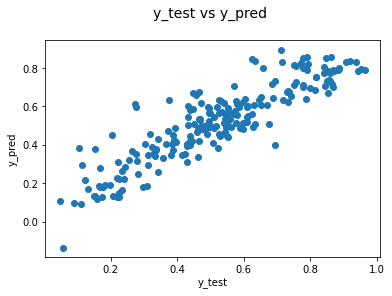

In [111]:
# Plotting y_test and y_pred to understand the spread

plt.scatter(y_test, y_test_pred)

plt.title('y_test vs y_pred \n', fontsize = 14)              
plt.xlabel('y_test', fontsize = 10)                          
plt.ylabel('y_pred', fontsize = 10)

plt.show()

In [112]:
# viewing the final constant and the coefficient of each independant variable
lr_8.params.round(3)

const              0.191
yr                 0.234
holiday           -0.096
temp               0.478
windspeed         -0.148
spring            -0.055
summer             0.062
winter             0.094
sep                0.091
light rain/snow   -0.285
misty/cloudy      -0.079
dtype: float64

### Conclusion:

We can see that the equation of our best fitted line is:

$ cnt = 0.191 + 0.478  \times  temp - 0.285  \times  light rain / snow + 0.234 \times yr - 0.148 \times windspeed 
- 0.096 \times holiday + 0.094 \times winter + 0.091 \times sep - 0.079 \times misty / cloudy + 0.062 \times summer 
- 0.055 \times spring $

In multiple linear regression, size of the coefficient of each independent variable gives us the size of the effect that variable is having on our dependent variable, and the sign on the coefficient (positive or negative) gives us the direction of the effect.

The coefficient of each independent variable depicts the change in 'cnt' (dependant variable) relative to a one unit change in that particular independent variable, holding all other independent variables constant 

We can report back to BoomBikes the observations that the folowing variables affect the count/demand of bikes 
(in the order of most effect to least):

    - temperature has the maximum positive effect on count, 
    count is expected to increase with unit increase in 'temp'

    - light rain / snowy weather has the most negative effect on count, 
    count is expected to reduce with unit increase in 'light rain / snow'

    - year has the next highest effect on count, 
    count is expected to increase with unit increase in 'yr'

    - windspeed has the next highest effect on count, 
    count is expected to reduce with unit increase in 'windspeed'

    - holiday the next highest effect on count, 
    count is expected to reduce with unit increase in 'holiday'

    - winter season has the next highest effect on count, 
    count is expected to increase with unit increase in 'winter'

    - september month has the next highest effect on count, 
    count is expected to increase with unit increase in 'sep'

    - misty / cloudy weather has the next highest effect on count, 
    count is expected to reduce with unit increase in 'misty / cloudy'

    - summer season has the next highest effect on count, 
    count is expected to increase with unit increase in 'summer'

    - spring season has the next highest effect on count, 
    count is expected to reduce with unit increase in 'spring'